In [1]:
# import libraries 

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# read dataset 
shirt_df = pd.read_csv('Tshirt.csv')


In [10]:
# View the head rows 
shirt_df.head(10)

,Height,Weight,Size
0,157,62,S
1,162,58,S
2,155,59,S
3,159,58,S
4,157,52,S
5,154,57,S
6,161,58,S
7,162,59,S
8,160,57,S
9,160,59,S


In [4]:
# View the last rows
shirt_df.tail()

,Height,Weight,Size
31,169,64,L
32,170,62,L
33,170,63,L
34,167,61,L
35,170,68,L


In [5]:
shirt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  36 non-null     int64 
 1   Weight  36 non-null     int64 
 2   Size    36 non-null     object
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


In [6]:
# Describe does not show details for Object
shirt_df.describe()

,Height,Weight
count,36.000000,36.000000
mean,163.333333,61.583333
std,4.282856,3.434073
min,154.000000,52.000000
25%,160.750000,59.000000
50%,163.000000,62.000000
75%,167.000000,64.000000
max,170.000000,70.000000


In [7]:
shirt_df['Size'].value_counts()

L    19
S    17
Name: Size, dtype: int64

<AxesSubplot:xlabel='Height', ylabel='Weight'>

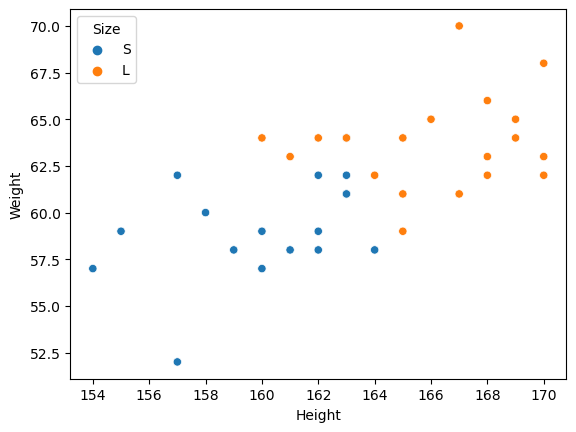

In [12]:
sns.scatterplot( x = 'Height', y = 'Weight', hue = 'Size', data = shirt_df)
#sns.scatterplot( x = 'Height', y = 'Weight', hue = shirt_df.Size.tolist(), data = shirt_df)


In [ ]:
#c_map = {'S': 'b', 'L': 'r'}
#plt.scatter( x = shirt_df.Height, y = shirt_df.Weight, c=[c_map[_] for _ in shirt_df.Size])

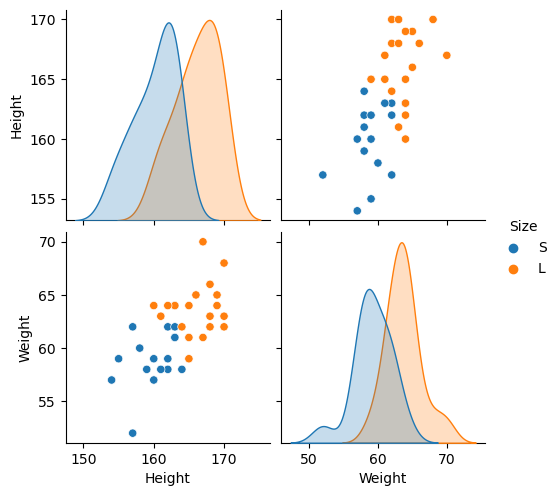

In [13]:
# kde - kernel density estimate
sns.pairplot(shirt_df, diag_kind='kde', hue = 'Size')

In [14]:
# Drop the Species (target label) coloumn
X = shirt_df.drop(['Size'],axis=1) # axis  = 1 means column operation i.e Assign all columns of  shirt_df except 'Size', to X

X.head()

,Height,Weight
0,157,62
1,162,58
2,155,59
3,159,58
4,157,52


In [15]:
y = shirt_df['Size']
y.head()

0    S
1    S
2    S
3    S
4    S
Name: Size, dtype: object

In [16]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [17]:
X_train.head()

,Height,Weight
35,170,68
33,170,63
28,168,63
32,170,62
8,160,57


In [18]:
y_train.head()

35    L
33    L
28    L
32    L
8     S
Name: Size, dtype: object

In [19]:
# Check the SHAPE of the DataFrame (no. of rows and no. of columns)
X_train.shape

(25, 2)

In [20]:
y_train.shape

(25,)

In [21]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  


In [22]:

#scaler.fit(X_train)  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

In [23]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [28]:
# Predict the values of classified for Test data
y_predict = classifier.predict(X_test)

C:\Users\TASUMANT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
# show result 
# PK: This step need NOT be done once you get familiar. Only for initially to demonstrate

result = {"Actual": y_test, "Predicted": y_predict}
pd.DataFrame(result)

,Actual,Predicted
31,L,L
20,L,L
16,S,S
30,L,L
22,L,L
15,S,S
10,S,S
2,S,S
11,S,L
29,L,L


In [30]:
metrics.accuracy_score(y_test, y_predict)

0.9090909090909091